In [27]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

In [33]:
pd.set_option('display.max_rows', 500)

# Chicago Crash Data

In [4]:
# read crash data
crash_data = pd.read_csv('https://data.cityofchicago.org/resource/85ca-t3if.csv?$limit=1000000000')

In [5]:
crash_data.dtypes

crash_record_id                   object
crash_date_est_i                  object
crash_date                        object
posted_speed_limit                 int64
traffic_control_device            object
device_condition                  object
weather_condition                 object
lighting_condition                object
first_crash_type                  object
trafficway_type                   object
lane_cnt                         float64
alignment                         object
roadway_surface_cond              object
road_defect                       object
report_type                       object
crash_type                        object
intersection_related_i            object
private_property_i                object
hit_and_run_i                     object
damage                            object
date_police_notified              object
prim_contributory_cause           object
sec_contributory_cause            object
street_no                          int64
street_direction

# Chicago Community Area Boundaries

In [8]:
# Load the community areas shapefile
community_areas = gpd.read_file("https://data.cityofchicago.org/api/geospatial/cauq-8yn6?method=export&format=GeoJSON")

In [9]:
community_areas

,community,area,shape_area,perimeter,area_num_1,area_numbe,comarea_id,comarea,shape_len,geometry
0,DOUGLAS,0,46004621.1581,0,35,35,0,0,31027.0545098,"MULTIPOLYGON (((-87.60914 41.84469, -87.60915 ..."
1,OAKLAND,0,16913961.0408,0,36,36,0,0,19565.5061533,"MULTIPOLYGON (((-87.59215 41.81693, -87.59231 ..."
2,FULLER PARK,0,19916704.8692,0,37,37,0,0,25339.0897503,"MULTIPOLYGON (((-87.6288 41.80189, -87.62879 4..."
3,GRAND BOULEVARD,0,48492503.1554,0,38,38,0,0,28196.8371573,"MULTIPOLYGON (((-87.60671 41.81681, -87.6067 4..."
4,KENWOOD,0,29071741.9283,0,39,39,0,0,23325.1679062,"MULTIPOLYGON (((-87.59215 41.81693, -87.59215 ..."
...,...,...,...,...,...,...,...,...,...,...
72,MOUNT GREENWOOD,0,75584290.0209,0,74,74,0,0,48665.1305392,"MULTIPOLYGON (((-87.69646 41.70714, -87.69644 ..."
73,MORGAN PARK,0,91877340.6988,0,75,75,0,0,46396.419362,"MULTIPOLYGON (((-87.64215 41.68508, -87.64249 ..."
74,OHARE,0,371835607.687,0,76,76,0,0,173625.98466,"MULTIPOLYGON (((-87.83658 41.9864, -87.83658 4..."
75,EDGEWATER,0,48449990.8397,0,77,77,0,0,31004.8309456,"MULTIPOLYGON (((-87.65456 41.99817, -87.65456 ..."


In [10]:
# Create a GeoDataFrame for your crash data
crash_data['geometry'] = crash_data.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)
crash_gdf = gpd.GeoDataFrame(crash_data, geometry='geometry', crs='EPSG:4326')

In [11]:
# Ensure both GeoDataFrames are in the same CRS (Coordinate Reference System)
community_areas = community_areas.to_crs('EPSG:4326')

In [13]:
# Perform a spatial join between crash data and community areas
crash_with_community = gpd.sjoin(crash_gdf, community_areas, how="left", predicate="within")

In [14]:
# Check the resulting DataFrame with community area names added
print(crash_with_community[['latitude', 'longitude', 'community', 'geometry']].head())

    latitude  longitude           community                    geometry
0  41.798372 -87.616218     WASHINGTON PARK  POINT (-87.61622 41.79837)
1  41.849238 -87.618535     NEAR SOUTH SIDE  POINT (-87.61853 41.84924)
2  41.962027 -87.646640              UPTOWN  POINT (-87.64664 41.96203)
3  41.874385 -87.732066  WEST GARFIELD PARK  POINT (-87.73207 41.87439)
4  41.778036 -87.715238           WEST LAWN  POINT (-87.71524 41.77804)


In [15]:
# Filter records where the community is "ARCHER HEIGHTS"
archer_heights_df = crash_with_community[crash_with_community['community'].str.upper() == "ARCHER HEIGHTS"]

# Check the filtered DataFrame
print(archer_heights_df.head())

                                       crash_record_id crash_date_est_i  \
17   61a3baf60ea72911f89703da91e7a8920a7cc347fe42b5...              NaN   
60   9bf7c3f776f3298ee22f200ea7a3172f8792d2a1ae90e4...              NaN   
226  7a8a655c86afb868aff2ba3d9580d440e0bc9bff0461e7...              NaN   
407  ab3480284ecaa651a517bb4b9cff63b37c677c08f31932...                N   
420  989e3615ce849773603e2b340a9fd645db0039e24626f7...              NaN   

                  crash_date  posted_speed_limit traffic_control_device  \
17   2024-09-15T20:30:00.000                  30         TRAFFIC SIGNAL   
60   2024-09-15T15:50:00.000                  10            NO CONTROLS   
226  2024-09-14T20:52:00.000                  35            NO CONTROLS   
407  2024-09-14T10:00:00.000                  25            NO CONTROLS   
420  2024-09-14T08:46:00.000                  20            NO CONTROLS   

         device_condition weather_condition      lighting_condition  \
17   FUNCTIONING PROPERLY  

In [16]:
archer_heights_df

,crash_record_id,crash_date_est_i,crash_date,posted_speed_limit,traffic_control_device,device_condition,weather_condition,lighting_condition,first_crash_type,trafficway_type,...,index_right,community,area,shape_area,perimeter,area_num_1,area_numbe,comarea_id,comarea,shape_len
17,61a3baf60ea72911f89703da91e7a8920a7cc347fe42b5...,NaN,2024-09-15T20:30:00.000,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,OTHER,...,55.0,ARCHER HEIGHTS,0,55922505.7212,0,57,57,0,0,31880.0210295
60,9bf7c3f776f3298ee22f200ea7a3172f8792d2a1ae90e4...,NaN,2024-09-15T15:50:00.000,10,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,PARKING LOT,...,55.0,ARCHER HEIGHTS,0,55922505.7212,0,57,57,0,0,31880.0210295
226,7a8a655c86afb868aff2ba3d9580d440e0bc9bff0461e7...,NaN,2024-09-14T20:52:00.000,35,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",SIDESWIPE SAME DIRECTION,NOT DIVIDED,...,55.0,ARCHER HEIGHTS,0,55922505.7212,0,57,57,0,0,31880.0210295
407,ab3480284ecaa651a517bb4b9cff63b37c677c08f31932...,N,2024-09-14T10:00:00.000,25,NO CONTROLS,NO CONTROLS,UNKNOWN,UNKNOWN,PARKED MOTOR VEHICLE,ONE-WAY,...,55.0,ARCHER HEIGHTS,0,55922505.7212,0,57,57,0,0,31880.0210295
420,989e3615ce849773603e2b340a9fd645db0039e24626f7...,NaN,2024-09-14T08:46:00.000,20,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,SIDESWIPE SAME DIRECTION,NOT DIVIDED,...,55.0,ARCHER HEIGHTS,0,55922505.7212,0,57,57,0,0,31880.0210295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
872940,6baab120d76cd5208c83033d4687cd90dec07518dfb7c9...,NaN,2015-09-09T15:20:00.000,30,NO CONTROLS,NO CONTROLS,UNKNOWN,UNKNOWN,SIDESWIPE SAME DIRECTION,UNKNOWN,...,55.0,ARCHER HEIGHTS,0,55922505.7212,0,57,57,0,0,31880.0210295
873134,c2657b59195376995e2b092557d2e0d0d94d31a3a1a67b...,NaN,2015-09-04T15:00:00.000,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,UNKNOWN,...,55.0,ARCHER HEIGHTS,0,55922505.7212,0,57,57,0,0,31880.0210295
873250,5299d07dc47ace579ed0de2b24cd0f26be3771c82d55ba...,NaN,2015-08-31T19:30:00.000,20,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,REAR END,DIVIDED - W/MEDIAN (NOT RAISED),...,55.0,ARCHER HEIGHTS,0,55922505.7212,0,57,57,0,0,31880.0210295
873409,78b38e6e79b8f9a05d7ff994b0af08086dae2260d32318...,NaN,2015-08-24T08:20:00.000,25,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,SIDESWIPE OPPOSITE DIRECTION,NOT DIVIDED,...,55.0,ARCHER HEIGHTS,0,55922505.7212,0,57,57,0,0,31880.0210295


In [17]:
# Ensure crash_date is in datetime format
archer_heights_df['crash_date'] = pd.to_datetime(archer_heights_df['crash_date'])

/opt/anaconda3/lib/python3.11/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [18]:
# Extract the year from the crash_date column
archer_heights_df['year'] = archer_heights_df['crash_date'].dt.year

/opt/anaconda3/lib/python3.11/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [19]:
# Group by year and calculate the number of crashes, total injuries, and fatal injuries
crash_summary = archer_heights_df.groupby('year').agg(
    total_crashes=('crash_date', 'size'),              # Count the total crashes
    total_injuries=('injuries_total', 'sum'),           # Sum of total injuries
    total_fatal_injuries=('injuries_fatal', 'sum')      # Sum of fatal injuries
).reset_index()

In [21]:
# Display the summary DataFrame
print(crash_summary)

   year  total_crashes  total_injuries  total_fatal_injuries
0  2015             75             1.0                   0.0
1  2016            386             9.0                   0.0
2  2017            747            82.0                   1.0
3  2018           1001           124.0                   3.0
4  2019            937           149.0                   0.0
5  2020            707           138.0                   4.0
6  2021            864           129.0                   1.0
7  2022            938           135.0                   2.0
8  2023            983           212.0                   1.0
9  2024            665           136.0                   3.0


In [28]:
# Ensure the crash_data['latitude'] and crash_data['longitude'] columns exist and are float type
crash_data['geometry'] = crash_data.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)

# Create a GeoDataFrame for crash data
crash_gdf = gpd.GeoDataFrame(crash_data, geometry='geometry', crs='EPSG:4326')

# Ensure both GeoDataFrames have the same CRS
community_areas = community_areas.to_crs(crash_gdf.crs)

# Perform spatial join to assign each crash to a community
crash_gdf_with_community = gpd.sjoin(crash_gdf, community_areas, how="left", predicate="within")

# Check for the join results (optional)
print(crash_gdf_with_community[['latitude', 'longitude', 'community']].head())

    latitude  longitude           community
0  41.798372 -87.616218     WASHINGTON PARK
1  41.849238 -87.618535     NEAR SOUTH SIDE
2  41.962027 -87.646640              UPTOWN
3  41.874385 -87.732066  WEST GARFIELD PARK
4  41.778036 -87.715238           WEST LAWN


In [29]:
# Ensure crash_date is in datetime format
crash_gdf_with_community['crash_date'] = pd.to_datetime(crash_gdf_with_community['crash_date'])

# Filter crash data for the year 2023
crash_2023 = crash_gdf_with_community[crash_gdf_with_community['crash_date'].dt.year == 2023]

# Group by community and count crashes
crash_count_2023 = crash_2023.groupby('community').agg(
    total_crashes=('crash_date', 'size')  # Count crashes per community
).reset_index()

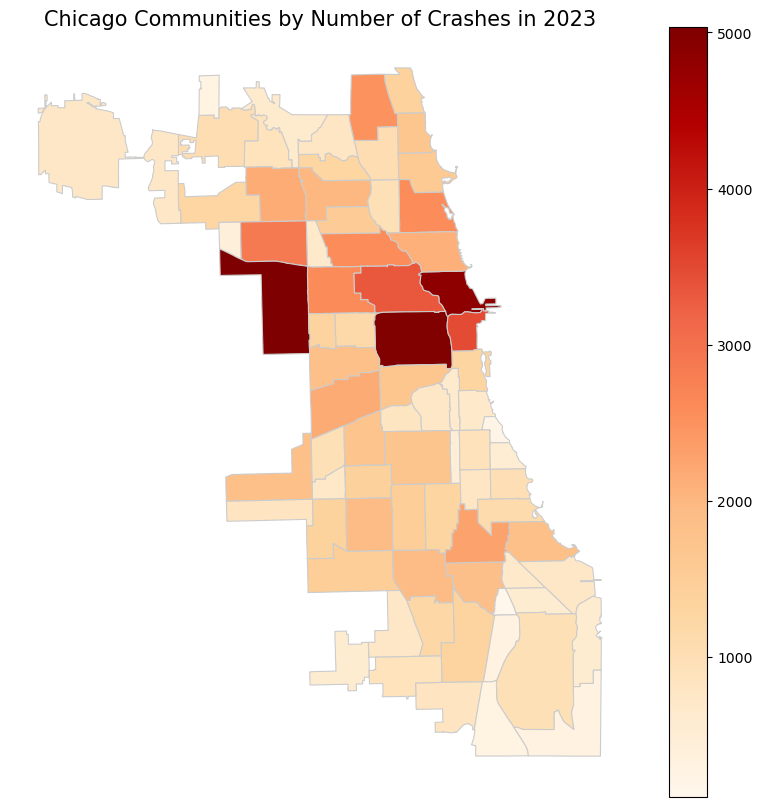

In [30]:
# Merge crash count data with community areas
community_areas = community_areas.merge(crash_count_2023, how="left", left_on="community", right_on="community")

# Replace NaN values with 0 (in case some communities have no crashes in 2023)
community_areas['total_crashes'].fillna(0, inplace=True)

# Plot the choropleth map
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Plot the communities with crash data using a choropleth
community_areas.plot(column='total_crashes', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Add titles and labels
ax.set_title('Chicago Communities by Number of Crashes in 2023', fontsize=15)
ax.set_axis_off()

# Show the plot
plt.show()

In [31]:
# Sort by the total number of crashes in descending order
crash_count_2023_sorted = crash_count_2023.sort_values(by='total_crashes', ascending=False)

In [34]:
crash_count_2023_sorted

,community,total_crashes
5,AUSTIN,5035
49,NEAR WEST SIDE,5015
47,NEAR NORTH SIDE,4858
41,LOOP,3488
75,WEST TOWN,3352
8,BELMONT CRAGIN,2870
32,HUMBOLDT PARK,2595
37,LAKE VIEW,2579
40,LOGAN SQUARE,2574
74,WEST RIDGE,2476
